In [8]:
import scipy.io
import numpy as np
import tensorflow as tf
from sklearn.preprocessing import MaxAbsScaler, StandardScaler, MinMaxScaler
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
import itertools
from tensorflow.keras.callbacks import  EarlyStopping
import random

# 기존 train 데이터 불러오기
# [11, 505000, 2]
train_sub_data = scipy.io.loadmat('../datas/160hz/train_5day_160hz.mat', squeeze_me=True)['data']

# 퍼블릭 데이터 불러오기
# [109, 9600, 2]
public_data = scipy.io.loadmat('../datas/160hz/Motor_Imagery.mat', squeeze_me=True)['data']

# 기존 test 데이터 불러오기
# [11, 101402, 2]
test_sub_data = scipy.io.loadmat('../datas/160hz/test_6day_160hz(2).mat', squeeze_me=True)['data']

# # 데이터를 480(= 160*3) 크기로 사용할 수 있도록 그 배수로 전체 데이터 잘라줌
data_cut_size = 504960 # 480*1052 = 504960
public_cut_size = 9600 # 480*20 = 9600
test_cut_size = 101280 # 480*211 = 101280

# 트레인 sub 수
train_sub_cnt = train_sub_data.shape[0]
# 퍼블릭 데이터 sub 수
public_sub_cnt = public_data.shape[0]
# test 데이터 sub 수
test_sub_cnt = test_sub_data.shape[0]

sub_cnt = train_sub_cnt + public_sub_cnt

train_sub_cut = train_sub_data[:, 0:data_cut_size, :]
public_data_cut = public_data[:, 0:public_cut_size, :]
test_sub_cut = test_sub_data[:, 0:test_cut_size, :]

print(train_sub_cut.shape)
print(test_sub_cut.shape)
print(public_data_cut.shape)

# 데이터를 스케일링 하기 위해 2D로 reshape
train_sub_2D = train_sub_cut.reshape(-1, 1)
public_data_2D = public_data_cut.reshape(-1, 1)
test_2D = test_sub_cut.reshape(-1, 1)

# 데이터를 StandardScaler로 스케일링
# 데이터들 모두 같은 방식으로 스케일링함
SDscaler = StandardScaler()
SDscaler.fit(train_sub_2D)
train_scaled = SDscaler.transform(train_sub_2D)
test_scaled = SDscaler.transform(test_2D)
public_scaled = SDscaler.transform(public_data_2D)

# 데이터 크기를 480로 맞춰줌
# 5554560/480 = 115,72
data_size = 480
train_sub_size = 1052 # 1명당 3초 데이터 1052개
public_sub_size = 20
test_sub_size = 211

train_data = train_scaled.reshape(train_sub_cnt * train_sub_size, data_size, 2)
public_data = public_scaled.reshape(public_sub_cnt * public_sub_size, data_size, 2)
test_data = test_scaled.reshape(test_sub_cnt * test_sub_size, data_size, 2)

print(train_data.shape)
print(public_data.shape)
print(test_data.shape)

#test data를 sub:other=1:1로 만들기 위해서 각 sub 추출
test_data_each = []
for i in range(test_sub_cnt):
    test_data_each.insert(i, test_data[i*test_sub_size:(i+1)*test_sub_size, :, :])
# print(test_data_each)

#train data를 sub:other=1:1로 만들기 위해서 각 sub 추출
train_data_each = []
for i in range(train_sub_cnt):
    train_data_each.insert(i, train_data[i*train_sub_size:(i+1)*train_sub_size, :, :])
    
public_data_each = []
for i in range(public_sub_cnt):
    public_data_each.insert(i, public_data[i*public_sub_size:(i+1)*public_sub_size, :, :])
    
print(len(train_data_each))
print(len(public_data_each))
print(len(test_data_each))

(11, 504960, 2)
(11, 101280, 2)
(109, 9600, 2)
(11572, 480, 2)
(2180, 480, 2)
(2321, 480, 2)
11
109
11


In [21]:
# 평가 지표
test_pre_all = []
conf_mat_all = []
test_loss_all = []
test_acc_all = []
test_sen_all = []
test_spe_all = []
frr_all = []
far_all = []

(4208, 480, 2)
(844, 480, 2)
Model: "model_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_6 (InputLayer)         [(None, 480, 2)]          0         
_________________________________________________________________
conv1d_15 (Conv1D)           (None, 480, 16)           112       
_________________________________________________________________
max_pooling1d_15 (MaxPooling (None, 160, 16)           0         
_________________________________________________________________
conv1d_16 (Conv1D)           (None, 160, 32)           1568      
_________________________________________________________________
max_pooling1d_16 (MaxPooling (None, 53, 32)            0         
_________________________________________________________________
conv1d_17 (Conv1D)           (None, 53, 64)            6208      
_________________________________________________________________
max_pooling1d_17 (MaxPooling (

211/211 [==============================] - 2s 10ms/step - loss: 0.0418 - accuracy: 0.9838
Epoch 62/100
211/211 [==============================] - 2s 10ms/step - loss: 0.0395 - accuracy: 0.9865
Epoch 63/100
211/211 [==============================] - 2s 10ms/step - loss: 0.0397 - accuracy: 0.9865
Epoch 64/100
211/211 [==============================] - 2s 9ms/step - loss: 0.0285 - accuracy: 0.9905
Epoch 65/100
211/211 [==============================] - 2s 9ms/step - loss: 0.0559 - accuracy: 0.9803
Epoch 66/100
211/211 [==============================] - 2s 9ms/step - loss: 0.0399 - accuracy: 0.9860
Epoch 67/100
211/211 [==============================] - 2s 9ms/step - loss: 0.0437 - accuracy: 0.9829
Epoch 68/100
211/211 [==============================] - 2s 9ms/step - loss: 0.0533 - accuracy: 0.9808
Epoch 69/100
211/211 [==============================] - 2s 9ms/step - loss: 0.0562 - accuracy: 0.9786
Epoch 70/100
211/211 [==============================] - 2s 9ms/step - loss: 0.0458 - accurac

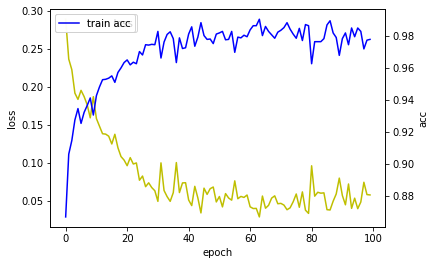

27/27 - 0s - loss: 0.5800 - accuracy: 0.8081
[[475 158]
 [  4 207]]

 [633 211]
sensitivity :  0.981042654028436
specificity :  0.7503949447077409
frr :  0.018957345971563982
far :  0.24960505529225907


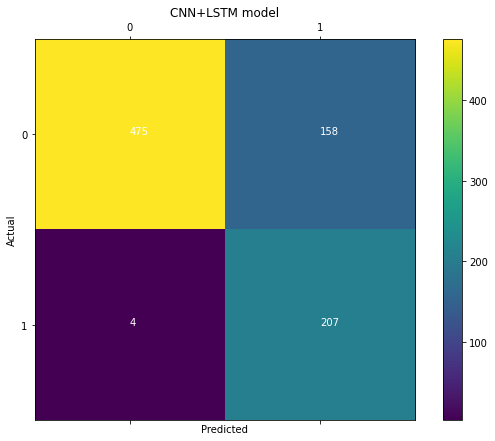

(4208, 480, 2)
(844, 480, 2)
Model: "model_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_7 (InputLayer)         [(None, 480, 2)]          0         
_________________________________________________________________
conv1d_18 (Conv1D)           (None, 480, 16)           112       
_________________________________________________________________
max_pooling1d_18 (MaxPooling (None, 160, 16)           0         
_________________________________________________________________
conv1d_19 (Conv1D)           (None, 160, 32)           1568      
_________________________________________________________________
max_pooling1d_19 (MaxPooling (None, 53, 32)            0         
_________________________________________________________________
conv1d_20 (Conv1D)           (None, 53, 64)            6208      
_________________________________________________________________
max_pooling1d_20 (MaxPooling (

211/211 [==============================] - 2s 10ms/step - loss: 0.0313 - accuracy: 0.9926
Epoch 62/100
211/211 [==============================] - 2s 10ms/step - loss: 0.0355 - accuracy: 0.9884
Epoch 63/100
211/211 [==============================] - 2s 10ms/step - loss: 0.0184 - accuracy: 0.9943
Epoch 64/100
211/211 [==============================] - 2s 9ms/step - loss: 0.0848 - accuracy: 0.9734
Epoch 65/100
211/211 [==============================] - 2s 10ms/step - loss: 0.0621 - accuracy: 0.9777
Epoch 66/100
211/211 [==============================] - 2s 10ms/step - loss: 0.0336 - accuracy: 0.9898
Epoch 67/100
211/211 [==============================] - 2s 10ms/step - loss: 0.0181 - accuracy: 0.9929
Epoch 68/100
211/211 [==============================] - 2s 10ms/step - loss: 0.0660 - accuracy: 0.9796
Epoch 69/100
211/211 [==============================] - 2s 10ms/step - loss: 0.0367 - accuracy: 0.9876
Epoch 70/100
211/211 [==============================] - 2s 10ms/step - loss: 0.0510 - a

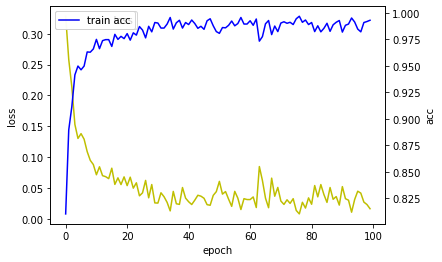

27/27 - 0s - loss: 0.3952 - accuracy: 0.9218
[[594  39]
 [ 27 184]]

 [633 211]
sensitivity :  0.8720379146919431
specificity :  0.9383886255924171
frr :  0.12796208530805686
far :  0.061611374407582936


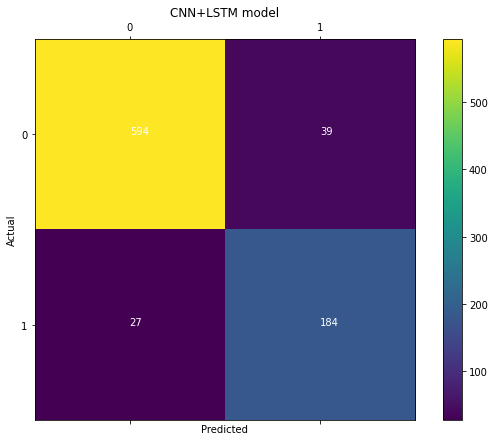

(4208, 480, 2)
(844, 480, 2)
Model: "model_7"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_8 (InputLayer)         [(None, 480, 2)]          0         
_________________________________________________________________
conv1d_21 (Conv1D)           (None, 480, 16)           112       
_________________________________________________________________
max_pooling1d_21 (MaxPooling (None, 160, 16)           0         
_________________________________________________________________
conv1d_22 (Conv1D)           (None, 160, 32)           1568      
_________________________________________________________________
max_pooling1d_22 (MaxPooling (None, 53, 32)            0         
_________________________________________________________________
conv1d_23 (Conv1D)           (None, 53, 64)            6208      
_________________________________________________________________
max_pooling1d_23 (MaxPooling (

211/211 [==============================] - 2s 10ms/step - loss: 0.0211 - accuracy: 0.9926
Epoch 62/100
211/211 [==============================] - 2s 10ms/step - loss: 0.0290 - accuracy: 0.9888
Epoch 63/100
211/211 [==============================] - 2s 10ms/step - loss: 0.0395 - accuracy: 0.9862
Epoch 64/100
211/211 [==============================] - 2s 10ms/step - loss: 0.0335 - accuracy: 0.9907
Epoch 65/100
211/211 [==============================] - 2s 10ms/step - loss: 0.0224 - accuracy: 0.9922
Epoch 66/100
211/211 [==============================] - 2s 10ms/step - loss: 0.0385 - accuracy: 0.9867
Epoch 67/100
211/211 [==============================] - 2s 10ms/step - loss: 0.0277 - accuracy: 0.9903
Epoch 68/100
211/211 [==============================] - 2s 10ms/step - loss: 0.0229 - accuracy: 0.9938
Epoch 69/100
211/211 [==============================] - 2s 9ms/step - loss: 0.0364 - accuracy: 0.9869
Epoch 70/100
211/211 [==============================] - 2s 9ms/step - loss: 0.0214 - ac

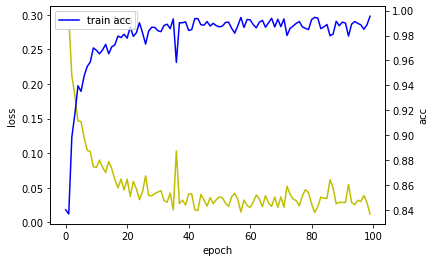

27/27 - 0s - loss: 0.3727 - accuracy: 0.9171
[[590  43]
 [ 27 184]]

 [633 211]
sensitivity :  0.8720379146919431
specificity :  0.9320695102685624
frr :  0.12796208530805686
far :  0.0679304897314376


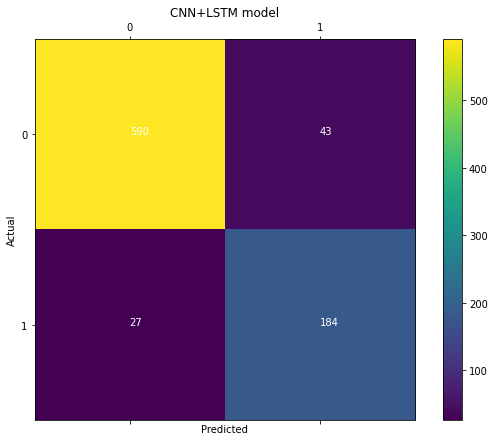

(4208, 480, 2)
(844, 480, 2)
Model: "model_8"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_9 (InputLayer)         [(None, 480, 2)]          0         
_________________________________________________________________
conv1d_24 (Conv1D)           (None, 480, 16)           112       
_________________________________________________________________
max_pooling1d_24 (MaxPooling (None, 160, 16)           0         
_________________________________________________________________
conv1d_25 (Conv1D)           (None, 160, 32)           1568      
_________________________________________________________________
max_pooling1d_25 (MaxPooling (None, 53, 32)            0         
_________________________________________________________________
conv1d_26 (Conv1D)           (None, 53, 64)            6208      
_________________________________________________________________
max_pooling1d_26 (MaxPooling (

211/211 [==============================] - 2s 10ms/step - loss: 0.0221 - accuracy: 0.9952
Epoch 62/100
211/211 [==============================] - 2s 10ms/step - loss: 0.0374 - accuracy: 0.9862
Epoch 63/100
211/211 [==============================] - 2s 10ms/step - loss: 0.0214 - accuracy: 0.9936
Epoch 64/100
211/211 [==============================] - 2s 10ms/step - loss: 0.0436 - accuracy: 0.9857
Epoch 65/100
211/211 [==============================] - 2s 10ms/step - loss: 0.0152 - accuracy: 0.9960
Epoch 66/100
211/211 [==============================] - 2s 10ms/step - loss: 0.0252 - accuracy: 0.9924
Epoch 67/100
211/211 [==============================] - 2s 10ms/step - loss: 0.0149 - accuracy: 0.9948
Epoch 68/100
211/211 [==============================] - 2s 9ms/step - loss: 0.0475 - accuracy: 0.9817
Epoch 69/100
211/211 [==============================] - 2s 10ms/step - loss: 0.0302 - accuracy: 0.9895
Epoch 70/100
211/211 [==============================] - 2s 10ms/step - loss: 0.0419 - a

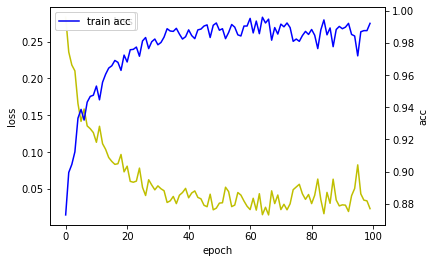

27/27 - 0s - loss: 0.5093 - accuracy: 0.8969
[[564  69]
 [ 18 193]]

 [633 211]
sensitivity :  0.9146919431279621
specificity :  0.8909952606635071
frr :  0.08530805687203792
far :  0.10900473933649289


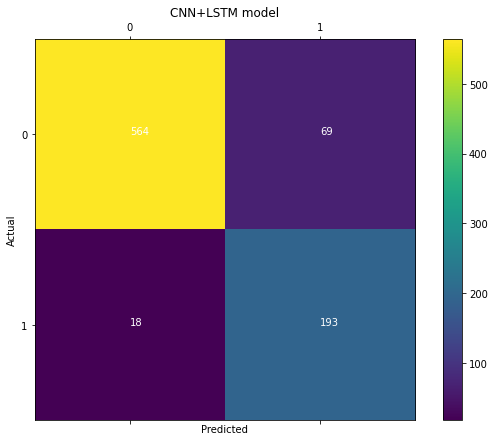

(4208, 480, 2)
(844, 480, 2)
Model: "model_9"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_10 (InputLayer)        [(None, 480, 2)]          0         
_________________________________________________________________
conv1d_27 (Conv1D)           (None, 480, 16)           112       
_________________________________________________________________
max_pooling1d_27 (MaxPooling (None, 160, 16)           0         
_________________________________________________________________
conv1d_28 (Conv1D)           (None, 160, 32)           1568      
_________________________________________________________________
max_pooling1d_28 (MaxPooling (None, 53, 32)            0         
_________________________________________________________________
conv1d_29 (Conv1D)           (None, 53, 64)            6208      
_________________________________________________________________
max_pooling1d_29 (MaxPooling (

211/211 [==============================] - 2s 10ms/step - loss: 0.0263 - accuracy: 0.9924
Epoch 62/100
211/211 [==============================] - 2s 10ms/step - loss: 0.0297 - accuracy: 0.9917
Epoch 63/100
211/211 [==============================] - 2s 10ms/step - loss: 0.0241 - accuracy: 0.9917
Epoch 64/100
211/211 [==============================] - 2s 10ms/step - loss: 0.0256 - accuracy: 0.9917
Epoch 65/100
211/211 [==============================] - 2s 10ms/step - loss: 0.0184 - accuracy: 0.9931
Epoch 66/100
211/211 [==============================] - 2s 10ms/step - loss: 0.0812 - accuracy: 0.9667
Epoch 67/100
211/211 [==============================] - 2s 10ms/step - loss: 0.0624 - accuracy: 0.9788
Epoch 68/100
211/211 [==============================] - 2s 9ms/step - loss: 0.0676 - accuracy: 0.9750
Epoch 69/100
211/211 [==============================] - 2s 9ms/step - loss: 0.0371 - accuracy: 0.9893
Epoch 70/100
211/211 [==============================] - 2s 9ms/step - loss: 0.0298 - acc

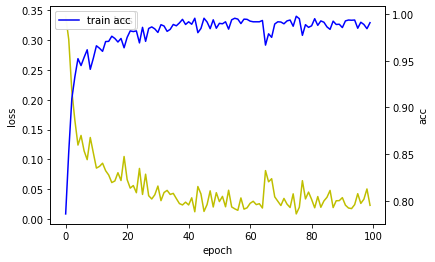

27/27 - 0s - loss: 0.6584 - accuracy: 0.8803
[[581  52]
 [ 49 162]]

 [633 211]
sensitivity :  0.7677725118483413
specificity :  0.9178515007898894
frr :  0.23222748815165878
far :  0.08214849921011058


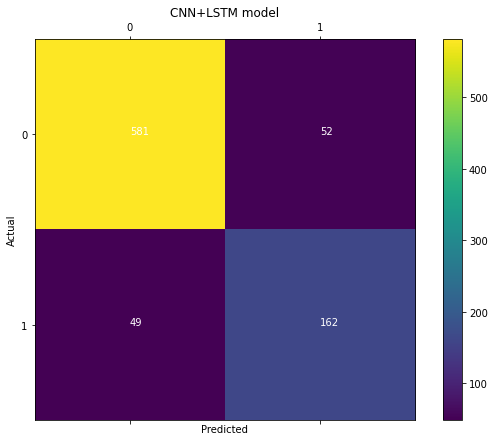

(4208, 480, 2)
(844, 480, 2)
Model: "model_10"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_11 (InputLayer)        [(None, 480, 2)]          0         
_________________________________________________________________
conv1d_30 (Conv1D)           (None, 480, 16)           112       
_________________________________________________________________
max_pooling1d_30 (MaxPooling (None, 160, 16)           0         
_________________________________________________________________
conv1d_31 (Conv1D)           (None, 160, 32)           1568      
_________________________________________________________________
max_pooling1d_31 (MaxPooling (None, 53, 32)            0         
_________________________________________________________________
conv1d_32 (Conv1D)           (None, 53, 64)            6208      
_________________________________________________________________
max_pooling1d_32 (MaxPooling 

211/211 [==============================] - 2s 9ms/step - loss: 0.0412 - accuracy: 0.9865
Epoch 62/100
211/211 [==============================] - 2s 10ms/step - loss: 0.0212 - accuracy: 0.9910
Epoch 63/100
211/211 [==============================] - 2s 10ms/step - loss: 0.0118 - accuracy: 0.9957
Epoch 64/100
211/211 [==============================] - 2s 10ms/step - loss: 0.0178 - accuracy: 0.9943
Epoch 65/100
211/211 [==============================] - 2s 10ms/step - loss: 0.0351 - accuracy: 0.9876
Epoch 66/100
211/211 [==============================] - 2s 10ms/step - loss: 0.0280 - accuracy: 0.9891
Epoch 67/100
211/211 [==============================] - 2s 10ms/step - loss: 0.0220 - accuracy: 0.9933
Epoch 68/100
211/211 [==============================] - 2s 10ms/step - loss: 0.0149 - accuracy: 0.9957
Epoch 69/100
211/211 [==============================] - 2s 10ms/step - loss: 0.0491 - accuracy: 0.9843
Epoch 70/100
211/211 [==============================] - 2s 10ms/step - loss: 0.0283 - a

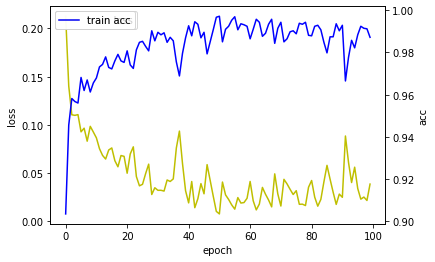

27/27 - 0s - loss: 0.2259 - accuracy: 0.9479
[[604  29]
 [ 15 196]]

 [633 211]
sensitivity :  0.9289099526066351
specificity :  0.9541864139020537
frr :  0.07109004739336493
far :  0.045813586097946286


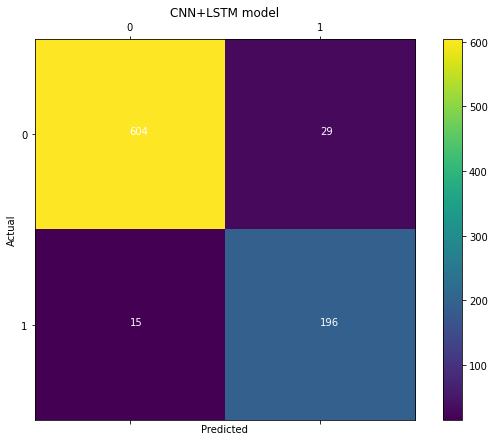

(4208, 480, 2)
(844, 480, 2)
Model: "model_11"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_12 (InputLayer)        [(None, 480, 2)]          0         
_________________________________________________________________
conv1d_33 (Conv1D)           (None, 480, 16)           112       
_________________________________________________________________
max_pooling1d_33 (MaxPooling (None, 160, 16)           0         
_________________________________________________________________
conv1d_34 (Conv1D)           (None, 160, 32)           1568      
_________________________________________________________________
max_pooling1d_34 (MaxPooling (None, 53, 32)            0         
_________________________________________________________________
conv1d_35 (Conv1D)           (None, 53, 64)            6208      
_________________________________________________________________
max_pooling1d_35 (MaxPooling 

211/211 [==============================] - 2s 10ms/step - loss: 0.0441 - accuracy: 0.9843
Epoch 62/100
211/211 [==============================] - 2s 10ms/step - loss: 0.0519 - accuracy: 0.9831
Epoch 63/100
211/211 [==============================] - 2s 10ms/step - loss: 0.0585 - accuracy: 0.9805
Epoch 64/100
211/211 [==============================] - 2s 10ms/step - loss: 0.0538 - accuracy: 0.9808
Epoch 65/100
211/211 [==============================] - 2s 10ms/step - loss: 0.0399 - accuracy: 0.9857
Epoch 66/100
211/211 [==============================] - 2s 10ms/step - loss: 0.0305 - accuracy: 0.9895
Epoch 67/100
211/211 [==============================] - 2s 10ms/step - loss: 0.0555 - accuracy: 0.9815
Epoch 68/100
211/211 [==============================] - 2s 10ms/step - loss: 0.0442 - accuracy: 0.9829
Epoch 69/100
211/211 [==============================] - 2s 9ms/step - loss: 0.0622 - accuracy: 0.9805
Epoch 70/100
211/211 [==============================] - 2s 9ms/step - loss: 0.0312 - ac

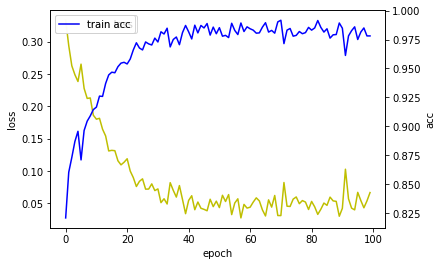

27/27 - 0s - loss: 0.9102 - accuracy: 0.7109
[[473 160]
 [ 84 127]]

 [633 211]
sensitivity :  0.6018957345971564
specificity :  0.7472353870458136
frr :  0.3981042654028436
far :  0.2527646129541864


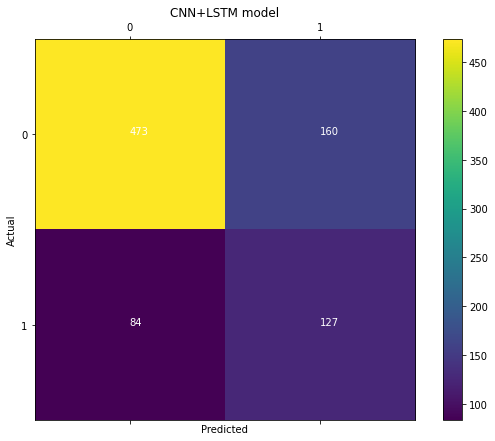

(4208, 480, 2)
(844, 480, 2)
Model: "model_12"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_13 (InputLayer)        [(None, 480, 2)]          0         
_________________________________________________________________
conv1d_36 (Conv1D)           (None, 480, 16)           112       
_________________________________________________________________
max_pooling1d_36 (MaxPooling (None, 160, 16)           0         
_________________________________________________________________
conv1d_37 (Conv1D)           (None, 160, 32)           1568      
_________________________________________________________________
max_pooling1d_37 (MaxPooling (None, 53, 32)            0         
_________________________________________________________________
conv1d_38 (Conv1D)           (None, 53, 64)            6208      
_________________________________________________________________
max_pooling1d_38 (MaxPooling 

211/211 [==============================] - 2s 10ms/step - loss: 0.0180 - accuracy: 0.9943
Epoch 62/100
211/211 [==============================] - 2s 10ms/step - loss: 0.0405 - accuracy: 0.9862
Epoch 63/100
211/211 [==============================] - 2s 10ms/step - loss: 0.0476 - accuracy: 0.9865
Epoch 64/100
211/211 [==============================] - 2s 10ms/step - loss: 0.0378 - accuracy: 0.9886
Epoch 65/100
211/211 [==============================] - 2s 9ms/step - loss: 0.0329 - accuracy: 0.9884
Epoch 66/100
211/211 [==============================] - 2s 9ms/step - loss: 0.0289 - accuracy: 0.9898
Epoch 67/100
211/211 [==============================] - 2s 9ms/step - loss: 0.0254 - accuracy: 0.9936
Epoch 68/100
211/211 [==============================] - 2s 9ms/step - loss: 0.0432 - accuracy: 0.9857
Epoch 69/100
211/211 [==============================] - 2s 10ms/step - loss: 0.0698 - accuracy: 0.9786
Epoch 70/100
211/211 [==============================] - 2s 10ms/step - loss: 0.0561 - accu

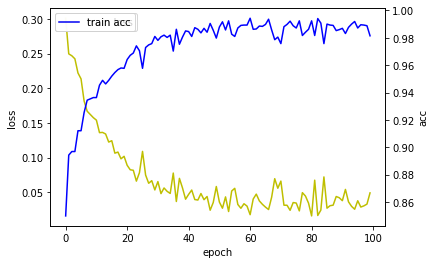

27/27 - 0s - loss: 0.6327 - accuracy: 0.7962
[[497 136]
 [ 36 175]]

 [633 211]
sensitivity :  0.8293838862559242
specificity :  0.7851500789889415
frr :  0.17061611374407584
far :  0.21484992101105846


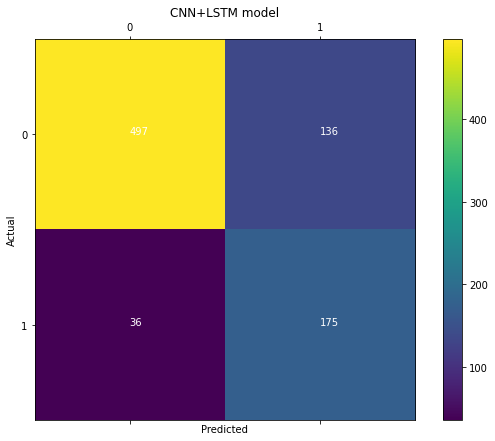

(4208, 480, 2)
(844, 480, 2)
Model: "model_13"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_14 (InputLayer)        [(None, 480, 2)]          0         
_________________________________________________________________
conv1d_39 (Conv1D)           (None, 480, 16)           112       
_________________________________________________________________
max_pooling1d_39 (MaxPooling (None, 160, 16)           0         
_________________________________________________________________
conv1d_40 (Conv1D)           (None, 160, 32)           1568      
_________________________________________________________________
max_pooling1d_40 (MaxPooling (None, 53, 32)            0         
_________________________________________________________________
conv1d_41 (Conv1D)           (None, 53, 64)            6208      
_________________________________________________________________
max_pooling1d_41 (MaxPooling 

211/211 [==============================] - 2s 9ms/step - loss: 0.0318 - accuracy: 0.9893
Epoch 62/100
211/211 [==============================] - 2s 9ms/step - loss: 0.0282 - accuracy: 0.9886
Epoch 63/100
211/211 [==============================] - 2s 10ms/step - loss: 0.0345 - accuracy: 0.9895
Epoch 64/100
211/211 [==============================] - 2s 10ms/step - loss: 0.0679 - accuracy: 0.9748
Epoch 65/100
211/211 [==============================] - 2s 10ms/step - loss: 0.0299 - accuracy: 0.9907
Epoch 66/100
211/211 [==============================] - 2s 9ms/step - loss: 0.0469 - accuracy: 0.9848
Epoch 67/100
211/211 [==============================] - 2s 9ms/step - loss: 0.0402 - accuracy: 0.9846
Epoch 68/100
211/211 [==============================] - 2s 9ms/step - loss: 0.0369 - accuracy: 0.9884
Epoch 69/100
211/211 [==============================] - 2s 9ms/step - loss: 0.0535 - accuracy: 0.9815
Epoch 70/100
211/211 [==============================] - 2s 9ms/step - loss: 0.0312 - accurac

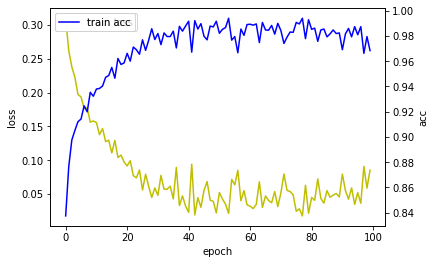

27/27 - 0s - loss: 0.3201 - accuracy: 0.8780
[[560  73]
 [ 30 181]]

 [633 211]
sensitivity :  0.8578199052132701
specificity :  0.8846761453396524
frr :  0.14218009478672985
far :  0.11532385466034756


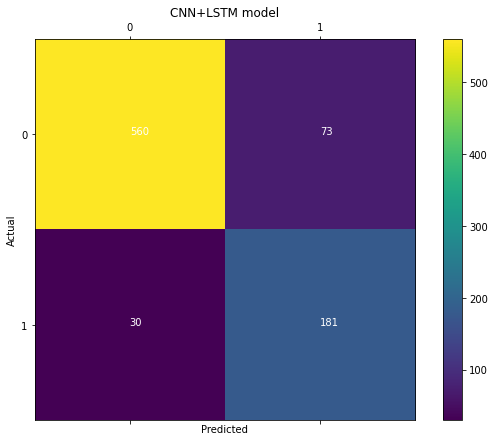

(4208, 480, 2)
(844, 480, 2)
Model: "model_14"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_15 (InputLayer)        [(None, 480, 2)]          0         
_________________________________________________________________
conv1d_42 (Conv1D)           (None, 480, 16)           112       
_________________________________________________________________
max_pooling1d_42 (MaxPooling (None, 160, 16)           0         
_________________________________________________________________
conv1d_43 (Conv1D)           (None, 160, 32)           1568      
_________________________________________________________________
max_pooling1d_43 (MaxPooling (None, 53, 32)            0         
_________________________________________________________________
conv1d_44 (Conv1D)           (None, 53, 64)            6208      
_________________________________________________________________
max_pooling1d_44 (MaxPooling 

211/211 [==============================] - 2s 10ms/step - loss: 0.0226 - accuracy: 0.9943
Epoch 61/100
211/211 [==============================] - 2s 10ms/step - loss: 0.0155 - accuracy: 0.9945
Epoch 62/100
211/211 [==============================] - 2s 10ms/step - loss: 0.0148 - accuracy: 0.9943
Epoch 63/100
211/211 [==============================] - 2s 10ms/step - loss: 0.0160 - accuracy: 0.9960
Epoch 64/100
211/211 [==============================] - 2s 10ms/step - loss: 0.0375 - accuracy: 0.9869
Epoch 65/100
211/211 [==============================] - 2s 10ms/step - loss: 0.0057 - accuracy: 0.9974
Epoch 66/100
211/211 [==============================] - 2s 10ms/step - loss: 0.0082 - accuracy: 0.9983
Epoch 67/100
211/211 [==============================] - 2s 10ms/step - loss: 0.0320 - accuracy: 0.9924
Epoch 68/100
211/211 [==============================] - 2s 10ms/step - loss: 0.0190 - accuracy: 0.9938
Epoch 69/100
211/211 [==============================] - 2s 10ms/step - loss: 0.0095 - 

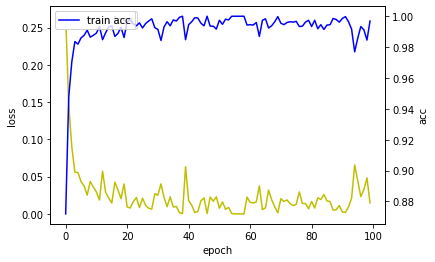

27/27 - 0s - loss: 0.0701 - accuracy: 0.9799
[[621  12]
 [  5 206]]

 [633 211]
sensitivity :  0.976303317535545
specificity :  0.981042654028436
frr :  0.023696682464454975
far :  0.018957345971563982


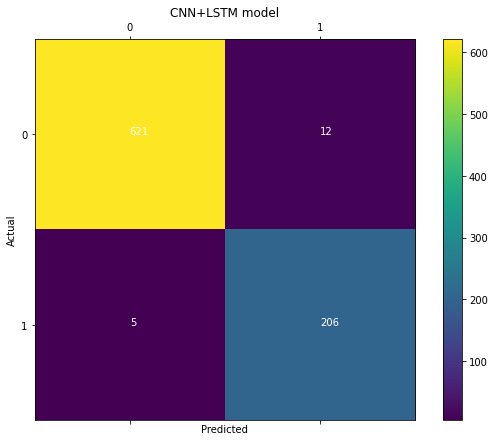

(4208, 480, 2)
(844, 480, 2)
Model: "model_15"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_16 (InputLayer)        [(None, 480, 2)]          0         
_________________________________________________________________
conv1d_45 (Conv1D)           (None, 480, 16)           112       
_________________________________________________________________
max_pooling1d_45 (MaxPooling (None, 160, 16)           0         
_________________________________________________________________
conv1d_46 (Conv1D)           (None, 160, 32)           1568      
_________________________________________________________________
max_pooling1d_46 (MaxPooling (None, 53, 32)            0         
_________________________________________________________________
conv1d_47 (Conv1D)           (None, 53, 64)            6208      
_________________________________________________________________
max_pooling1d_47 (MaxPooling 

211/211 [==============================] - 2s 10ms/step - loss: 0.0324 - accuracy: 0.9891
Epoch 62/100
211/211 [==============================] - 2s 10ms/step - loss: 0.0338 - accuracy: 0.9865
Epoch 63/100
211/211 [==============================] - 2s 10ms/step - loss: 0.0320 - accuracy: 0.9893
Epoch 64/100
211/211 [==============================] - 2s 10ms/step - loss: 0.0478 - accuracy: 0.9838
Epoch 65/100
211/211 [==============================] - 2s 10ms/step - loss: 0.0286 - accuracy: 0.9905
Epoch 66/100
211/211 [==============================] - 2s 10ms/step - loss: 0.0507 - accuracy: 0.9817
Epoch 67/100
211/211 [==============================] - 2s 10ms/step - loss: 0.0436 - accuracy: 0.9862
Epoch 68/100
211/211 [==============================] - 2s 10ms/step - loss: 0.0479 - accuracy: 0.9831
Epoch 69/100
211/211 [==============================] - 2s 10ms/step - loss: 0.0261 - accuracy: 0.9914
Epoch 70/100
211/211 [==============================] - 2s 10ms/step - loss: 0.0540 - 

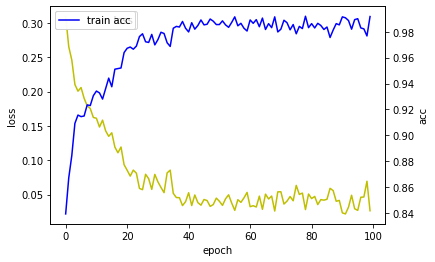

27/27 - 0s - loss: 0.4493 - accuracy: 0.8910
[[547  86]
 [  6 205]]

 [633 211]
sensitivity :  0.9715639810426541
specificity :  0.8641390205371248
frr :  0.02843601895734597
far :  0.1358609794628752


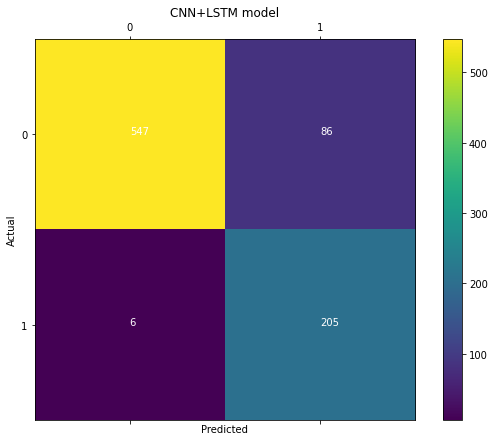

average_accuracy
0.8752692883664911
average_sensitivity
0.8703145196036192
average_specificity
0.8769208674421946
average_frr
0.12968548039638084
average_far
0.12307913255780555


In [22]:
# 각 sub 마다 모델 학습

# train data를 sub:other = 1:3로 만들기
# 3초 덩어리 개수 1052 : 3156
# 26 * 57 + 27 * 62 = 3156  ###########################안 됨 public data 20개씩 있음.
# => 97 * 4 + 98 * 6 + 20 * 109 = 3156

# test data를 sub:other = 1:3로 만들기
# 3초 덩어리 개수 211 : 633
# 63 * 7 + 64 * 3 = 633

for i in range(train_sub_cnt):
    cnt = 0
    train_data_n = train_data_each[i]
    test_data_n = test_data_each[i]
    
    for j in range(train_sub_cnt):
        if j != i and cnt < 4:
            cnt = cnt + 1
            train_data_n = np.append(train_data_n, np.array(random.sample(list(train_data_each[j]), 97)), axis = 0)
        elif j != i and cnt >= 4:
            train_data_n = np.append(train_data_n, np.array(random.sample(list(train_data_each[j]), 98)), axis = 0)
    
    for j in range(public_sub_cnt):
        train_data_n = np.append(train_data_n, np.array(random.sample(list(public_data_each[j]), 20)), axis = 0)
    
    cnt = 0
    
    for j in range(test_sub_cnt):
        if j != i and cnt < 7:
            cnt = cnt + 1
            test_data_n = np.append(test_data_n, np.array(random.sample(list(test_data_each[j]), 63)), axis = 0)
        elif j != i and cnt >= 7:
            test_data_n = np.append(test_data_n, np.array(random.sample(list(test_data_each[j]), 64)), axis = 0)
            
    print(train_data_n.shape)
    print(test_data_n.shape)
    
    train_label = np.zeros(4208)
    test_label = np.zeros(844)
    
    for j in range(len(train_label)):
        if (j < train_sub_size):
            train_label[j] = 1
            
    for j in range(len(test_label)):
        if (j < test_sub_size):
            test_label[j] = 1
 
    ################################################################
    # 모델 구성하기                                                #
    # 이진 분류이기 때문에 0~1 사이의 값을 나타내는 출력뉴런 1개   #
    ################################################################

    # Cnn 층
    inputs = tf.keras.Input(shape = (480, 2))

    layers = tf.keras.layers.Conv1D(filters = 16, kernel_size = 3, strides = 1, padding = 'same', activation  = 'relu')(inputs)
    layers = tf.keras.layers.MaxPool1D(3)(layers)

    layers = tf.keras.layers.Conv1D(filters = 32, kernel_size = 3, strides = 1, padding = 'same', activation  = 'relu')(layers)
    layers = tf.keras.layers.MaxPool1D(3)(layers)

    layers = tf.keras.layers.Conv1D(filters = 64, kernel_size = 3, strides = 1, padding = 'same', activation = 'relu')(layers)
    layers = tf.keras.layers.MaxPool1D(3)(layers)

    # LSTM 층
    layers = tf.keras.layers.LSTM(64)(layers)

    # Dense 층
    layers = tf.keras.layers.Dropout(0.3)(layers)
    layers = tf.keras.layers.Dense(128, activation='relu')(layers)
    # layers = tf.keras.layers.Dropout(0.01)(layers)
    layers = tf.keras.layers.Dense(64, activation='relu')(layers)
    # layers = tf.keras.layers.Dropout(0.05)(layers)
    layers = tf.keras.layers.Dense(1, activation='sigmoid')(layers)

    model = tf.keras.models.Model(inputs = inputs, outputs = layers)
    model.compile(loss= 'binary_crossentropy', optimizer= tf.keras.optimizers.Adam(0.005), metrics=['accuracy'])
    model.summary()
    
    early_stopping = tf.keras.callbacks.EarlyStopping(patience= 20)
    
#     # train 데이터를 train과 validation으로 분배
#     # validation 데이터를 여러 sub에서 가져갈 수 있도록 shuffle
#     x_train, x_val, y_train, y_val = train_test_split(train_data, train_label, test_size=0.1, shuffle=True, random_state=1)

    print('##########')
    print('# sub', i+1, ' #')
    print('##########')

    # 모델 돌리기
#     hist = model.fit(x_train, y_train, batch_size=40, epochs=200, validation_data=(x_val, y_val), verbose=1, callbacks= [early_stopping])
    hist = model.fit(train_data_n, train_label, batch_size=20, epochs=100, verbose=1)
    
    fig, loss_ax = plt.subplots()
    acc_ax = loss_ax.twinx()
    
    loss_ax.plot(hist.history['loss'], 'y', label = 'train loss')
    loss_ax.set_xlabel('epoch')
    loss_ax.set_ylabel('loss')
    loss_ax.legend(loc='upper left')
    
    
    acc_ax.plot(hist.history['accuracy'], 'b', label = 'train acc')
    acc_ax.set_ylabel('acc')
    acc_ax.legend(loc='upper left')
    
    plt.show()
    
    # save model
    model.save('Sub_Model_' + str(i + 1) + '.h5')
    
    test_loss, test_acc = model.evaluate(test_data_n, test_label, verbose= 2)
    test_pred = model.predict(test_data_n)
    
    test_loss_all.append(test_loss)
    test_acc_all.append(test_acc)
    
    # 확률이 0.5이상이면 자신(1), 작으면 타인(0)
    for i in range(len(test_pred)):
        if(0.5 <= test_pred[i]):
            test_pred[i] = 1

        else:
            test_pred[i] = 0
            
            
    test_pre_all.append(test_pred)
    
    # confusion matrix 생성
    conf_matrix = confusion_matrix(test_label, test_pred)
    
    #############################################################
    #       conf_matrix[0][0] = TN      conf_matrix[0][1] = FP  #
    #       conf_matrix[1][0] = FN      conf_matrix[1][1] = TP  #
    #############################################################

    print(conf_matrix)
    conf_mat_all.append(conf_matrix)

    # sum 이용 각 행 더하기
    row = conf_matrix.sum(axis=1)
    print('\n', row)

    # row[0] = spec의 분모, row[1] = sens의 분모

    test_sensitivity = conf_matrix[1][1] / row[1]
    test_specificity = conf_matrix[0][0] / row[0]
    
    test_frr = conf_matrix[1][0] / (conf_matrix[1][1]+conf_matrix[1][0])
    test_far = conf_matrix[0][1] / (conf_matrix[0][1]+conf_matrix[0][0])

    print('sensitivity : ', test_sensitivity)
    print('specificity : ', test_specificity) 
    print('frr : ', test_frr)
    print('far : ', test_far) 
    
    test_sen_all.append(test_sensitivity)
    test_spe_all.append(test_specificity)
    frr_all.append(test_frr)
    far_all.append(test_far)
    
    fig = plt.figure(figsize=(10, 7))
    ax = fig.add_subplot(111)

    cax = ax.matshow(conf_matrix)

    fig.colorbar(cax)

    for i, j in itertools.product(range(conf_matrix.shape[0]), range(conf_matrix.shape[1])):
        plt.text(j, i, conf_matrix[i, j], color="white")

    plt.title('CNN+LSTM model')
    plt.xlabel('Predicted')
    plt.ylabel('Actual')

    plt.show()
    
print('average_accuracy')
print(np.mean(test_acc_all))
print('average_sensitivity')
print(np.mean(test_sen_all))
print('average_specificity')
print(np.mean(test_spe_all))
print('average_frr')
print(np.mean(frr_all))
print('average_far')
print(np.mean(far_all))